In [4]:
%reload_ext autoreload
%autoreload 2
import sys
import importlib

sys.path.append('./')

from methods import *

# Refresh the imported modules
importlib.reload(sys.modules['methods'])

<module 'methods' from '/Users/filipstrozik/Documents/studies/IISEM/image-and-video-processing/Laboratorium 5-20241025/methods.py'>

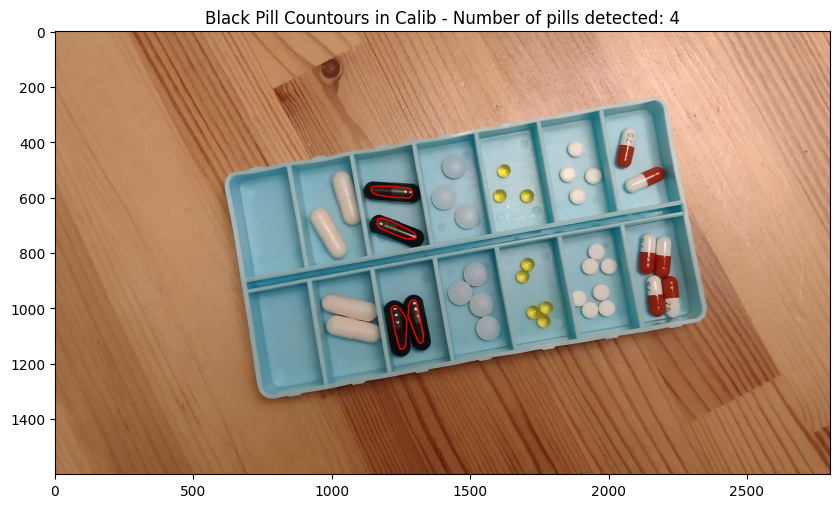

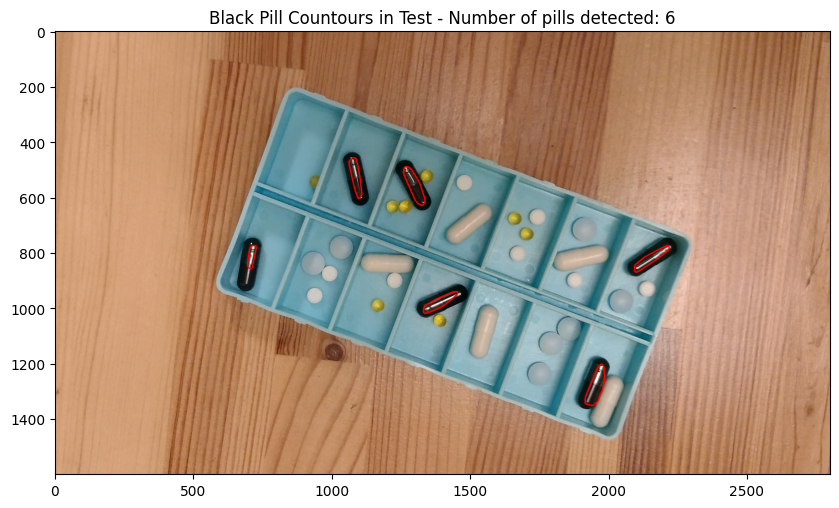

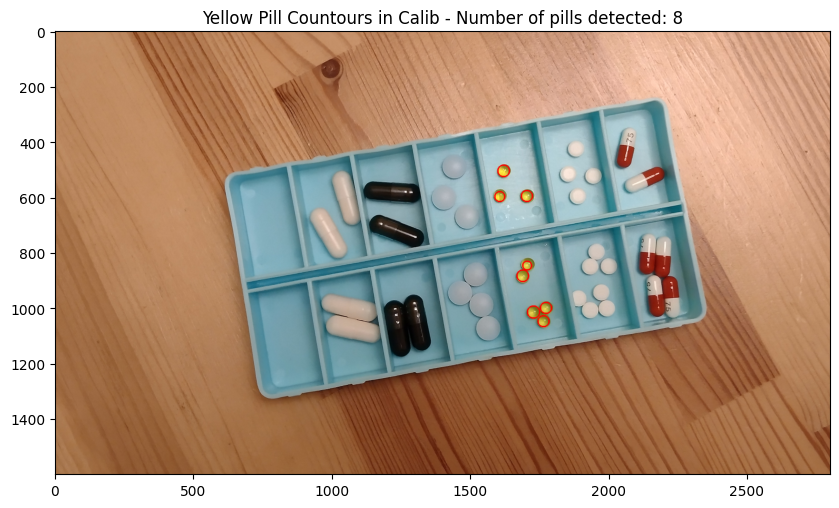

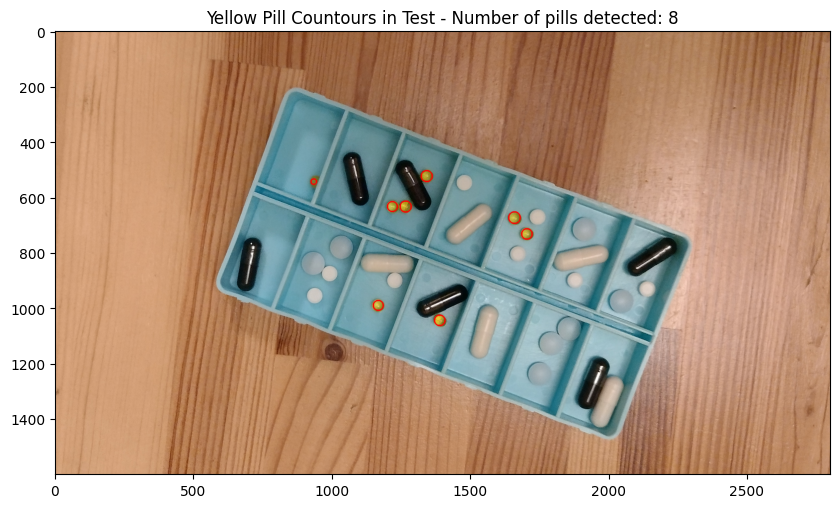

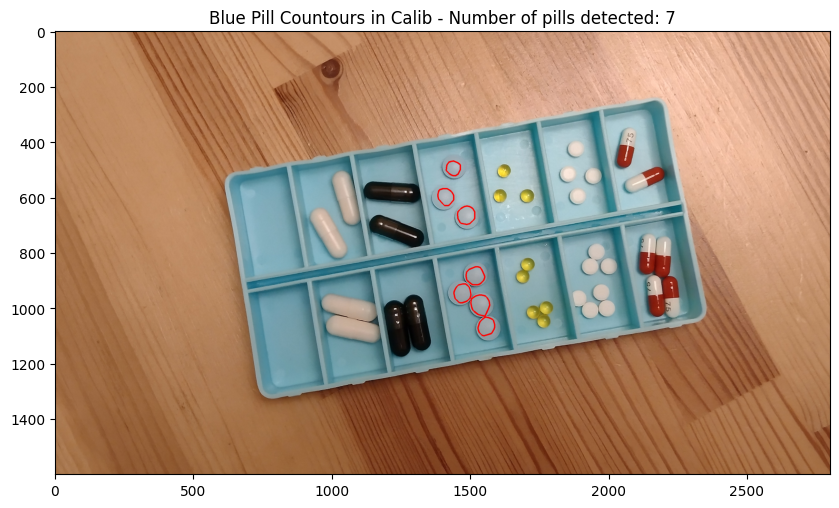

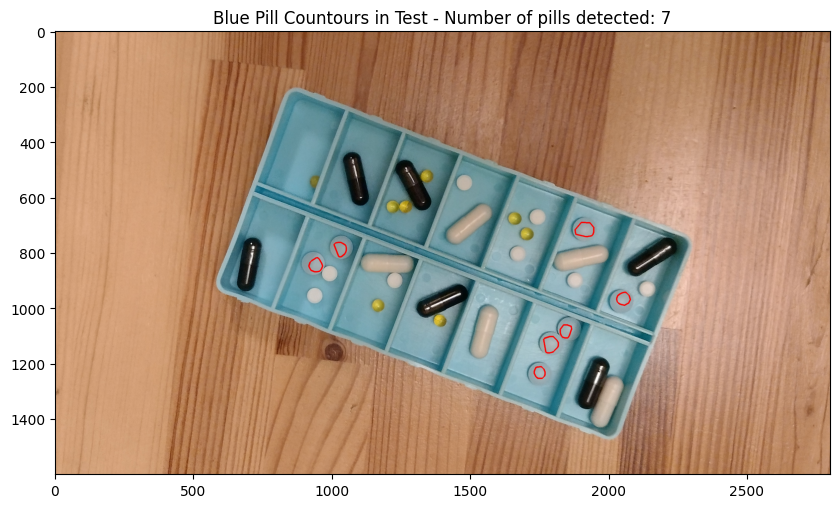

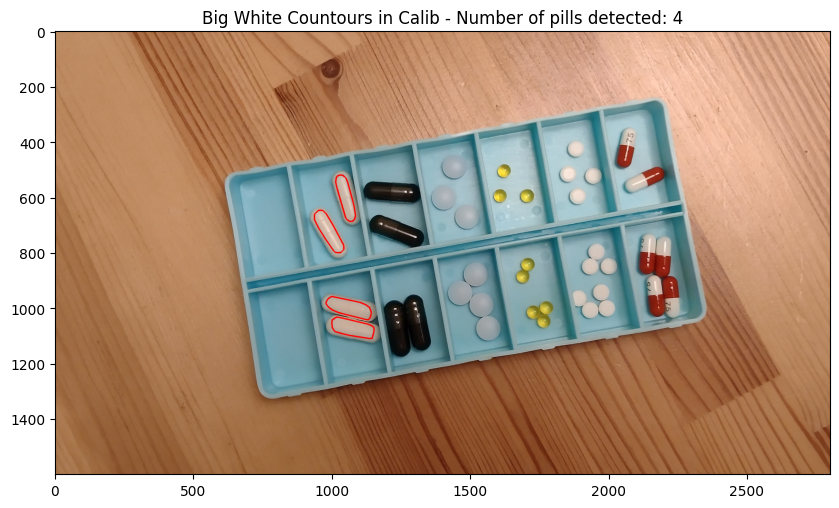

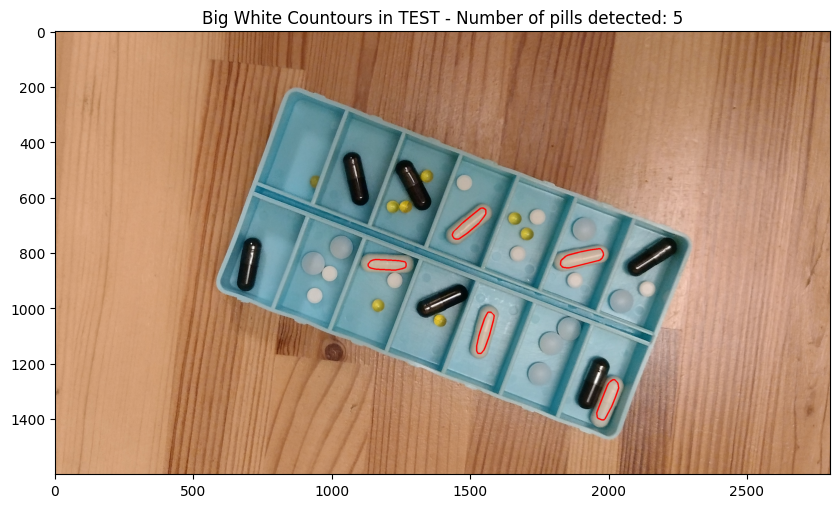

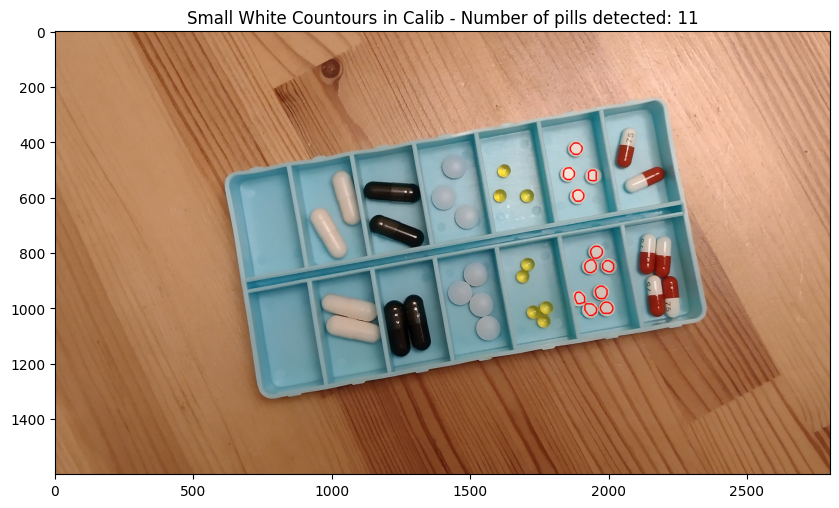

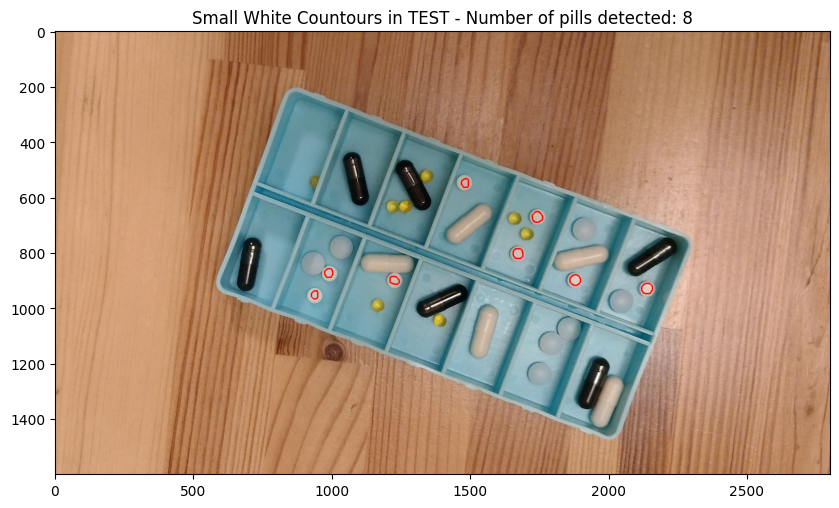

In [5]:
calib = cv2.imread("./Lab5_dane/calib.png")
test = cv2.imread("./Lab5_dane/test.png")

# black pills for calib
def process_pills(img, binarizer_function, title):
    processed_img = np.zeros_like(img)
    pill_contours = binarizer_function(img, False)
    cv2.drawContours(processed_img, pill_contours, -1, (255, 255, 0), 3)
    
    # # show original and processed images in rgb
    # fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    # ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # ax[0].set_title("Original Image")
    
    # Draw RED contours on the original image
    img_with_contours = img.copy()
    cv2.drawContours(img_with_contours, pill_contours, -1, (0, 0, 255), 3)
    
    # Show original and processed images in a single plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
    ax.set_title(title + f" - Number of pills detected: {len(pill_contours)}")
    
    plt.show()
    return processed_img, pill_contours

# black pills for calib
black_calib, black_pill_counturs_calib = process_pills(calib, black_pill_binarizer, "Black Pill Countours in Calib")

# black pills for test
black_test, black_pill_counturs_test = process_pills(test, black_pill_binarizer, "Black Pill Countours in Test")

# yellow pills
yellow_calib, yellow_pill_counturs_calib = process_pills(calib, yellow_pills_binarizer, "Yellow Pill Countours in Calib")
yellow_test, yellow_pill_counturs_test = process_pills(test, yellow_pills_binarizer, "Yellow Pill Countours in Test")

# blue pills
blue_calib, blue_pill_counturs_calib = process_pills(calib, blue_pills_binarizer, "Blue Pill Countours in Calib")
blue_test, blue_pill_counturs_test = process_pills(test, blue_pills_binarizer, "Blue Pill Countours in Test")

# big white
big_white_calib, big_white_counturs_calib = process_pills(calib, big_white_pills_binarize, "Big White Countours in Calib")
big_white_test, big_white_counturs_test = process_pills(test, big_white_pills_binarize, "Big White Countours in TEST")

# small white
small_white_calib, small_white_counturs_calib = process_pills(calib, small_white_pills_binarize, "Small White Countours in Calib")
small_white_test, small_white_counturs_test = process_pills(test, small_white_pills_binarize, "Small White Countours in TEST")

CARBON: 4
ESPU: 8
KETO: 7
PROBIO: 4
BIOX: 11


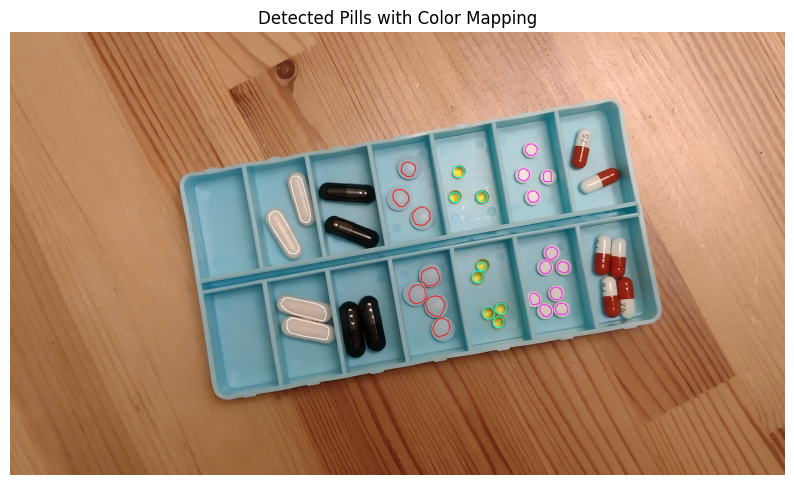

CARBON: 6
ESPU: 8
KETO: 7
PROBIO: 5
BIOX: 8


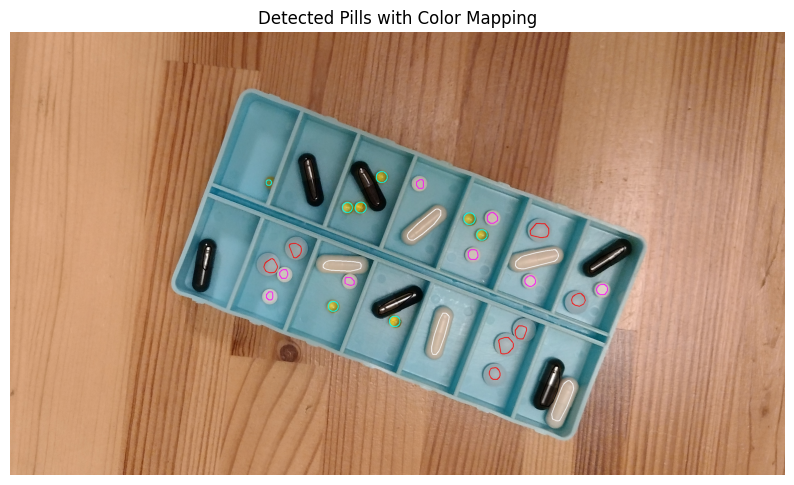

In [6]:
from collections import Counter

class PillType(Enum):
    PROBIO = 1  # duże białe kapsułki
    CARBON = 2  # duże czarne kapsułki
    KETO = 3  # niebieskie tabletki
    ESPU = 4  # małe żółte kapsułki
    BIOX = 5  # małe białe tabletki
    LINE = 6  # czerwono-białe kapsułki (klasa trudna - realizacja opcjonalna)


class Pill:
    """Output of object detection, represents a single instance"""

    def __init__(self, pill_type: PillType, location: Any):
        self.type = pill_type
        self.location = location


# Function to create Pill objects from contours
def create_pills_from_contours(contours, pill_type):
    detected_pills: List[Pill] = []

    for contour in contours:
        location = contour
        detected_pills.append(Pill(pill_type, location))
    
    return detected_pills

# Create a list to hold all detected pills
def detect_objects(image: np.ndarray, **kwargs) -> List[Pill]:
    all_pills = []
    show = False
    carbon = create_pills_from_contours(black_pill_binarizer(image, show), PillType.CARBON)

    espu = create_pills_from_contours(
        yellow_pills_binarizer(image, show), PillType.ESPU
    )

    keto = create_pills_from_contours(blue_pills_binarizer(image, show), PillType.KETO)

    probio = create_pills_from_contours(
        big_white_pills_binarize(image, show), PillType.PROBIO
    )

    biox = create_pills_from_contours(
        small_white_pills_binarize(image, show), PillType.BIOX
    )

    all_pills = carbon + espu + keto + probio + biox


    return all_pills


COLORMAP = {
    # RGB colorspace
    PillType.PROBIO: (255, 255, 255),
    PillType.CARBON: (0, 0, 0),
    PillType.KETO: (0, 0, 255),
    PillType.ESPU: (255, 255, 0),
    PillType.BIOX: (255, 0, 255),
    PillType.LINE: (255, 0, 0),
}


def display_objects(image: np.ndarray, objects: List[Pill]) -> None:
    # print count of each type of pills
    pill_counter = Counter(pill.type for pill in objects)
    for pill_type, count in pill_counter.items():
        print(f"{pill_type.name}: {count}")


    image = image.copy()
    
    for obj in objects:
        color = COLORMAP[obj.type]
        cv2.drawContours(image, [obj.location], -1, color, 2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Pills with Color Mapping")
    plt.axis('off')
    plt.show()

all_calib_pills = detect_objects(calib)

display_objects(calib, all_calib_pills)


all_test_pills = detect_objects(test)
display_objects(test, all_test_pills)